# Exploratory analysis speakers aggregations

This notebook has a similar structure that Retrieve_metadata `(SPEAKERS_METADATA/Retrieve_metadata.ipynb)`. 

However, it uses the results of classification step (extract quotations with colloquial langage) to perform an aggregation on speakers and apply an exploratory analysis. This notebook is the first iterative step in exploring the data on speakers aggregations. It does not consitutes any relevant statistical results and have to be considered only in a "exploratory way".

***Important remark:*** due to their large size, the samples of data have been retrieve in local. Therefore, if you do not have the sample, do not run the cells but only inspect the results of each cell that have been runned.

In [1]:
#importing the required modules
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Small adjustments to default style of plots, making sure it's readable and colorblind-friendly everywhere
plt.style.use('seaborn-colorblind')
plt.rcParams.update({'font.size' : 12.5,
                     'figure.figsize':(25,7)})

## 1. Import data


### Metadata

Pandas requires pyarrow to read parquet files, which can be installed using conda install pyarrow -c conda-forge.
You can load this file as a pandas dataframe using df = pd.read_parquet(<path_to_file>).

In [3]:
#Define the path for folder containing data
#TO BE MODIFIED ACCORDING HIS OWN FOLER containing data in local 
#Jules:
path = r'/Users/jules/kDrive/onedrive/Documents_Onedrive/EPFL/MA3/ADA/Project/Dataset/'
df_metadata = pd.read_parquet(path+'speaker_attributes.parquet')
#df_metadata.head()

### Quotations dataset

In [4]:
#Import the dataset sample

#Jules: 
path = r'/Users/jules/kDrive/onedrive/Documents_Onedrive/EPFL/MA3/ADA/Project/Dataset/'

df_sample = pd.read_json(path+'Sample_classified_1Mio_v1.json.bz2',compression = 'bz2',lines = True)


In [5]:
df_sample.sample(20)

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,p1,p2,delta_p,year,colloquial
375177,2018-04-17-120745,The message was of a threatening nature to tha...,Stuart Cameron,"[Q579107, Q7626385, Q7626387]",2018-04-17 00:00:00,1,"[[Stuart Cameron, 0.9575], [None, 0.0425]]",[http://wshu.org/post/9-assault-weapons-found-...,E,0.9575,0.0425,0.9150,2018,0
397575,2018-01-17-060704,is a major democratic reform that the nation i...,Vinay Sahasrabuddhe,[Q18210918],2018-01-17 14:09:24,1,"[[Vinay Sahasrabuddhe, 0.8183], [None, 0.1273]...",[https://www.oneindia.com/india/one-nation-one...,E,0.8183,0.1273,0.6910,2018,0
109690,2015-10-21-014813,"But quite quickly after the World Cup, I was j...",Julie Johnston,"[Q10552391, Q18922001]",2015-10-21 02:31:43,2,"[[Julie Johnston, 0.7817], [None, 0.2183]]",[http://www.seattletimes.com/sports/reign/us-w...,E,0.7817,0.2183,0.5634,2015,0
656822,2020-04-09-071591,We're not as wealthy. We don't have as many ve...,Francois Venter,[Q5484677],2020-04-09 20:20:41,4,"[[Francois Venter, 0.9317], [None, 0.0683]]",[https://www.chicagotribune.com/coronavirus/ct...,E,0.9317,0.0683,0.8634,2020,0
474817,2019-07-25-067915,"This time, I want to be 100 percent,",Gregory Polanco,[Q16234113],2019-07-25 15:51:39,2,"[[Gregory Polanco, 0.854], [None, 0.146]]",[https://www.bucsdugout.com/2019/7/25/8930075/...,E,0.8540,0.1460,0.7080,2019,0
360627,2018-03-08-105413,"Not just the top 10 can win this,",Simona Halep,[Q230156],2018-03-08 05:22:38,1,"[[Simona Halep, 0.8363], [None, 0.1472], [Madi...",[https://www.ocregister.com/2018/03/07/alexand...,E,0.8363,0.1472,0.6891,2018,0
215098,2016-05-31-002850,absolutely. If it's entertaining for the audie...,Dwayne Johnson,[Q10738],2016-05-31 17:33:56,1,"[[Dwayne Johnson, 0.7226], [None, 0.2774]]",[https://filmschoolrejects.com/all-the-movies-...,E,0.7226,0.2774,0.4452,2016,0
639851,2020-02-15-022362,I'm glad that Bellinger stepped up and said so...,Cody Bellinger,[Q29514757],2020-02-15 21:17:50,1,"[[Cody Bellinger, 0.8321], [None, 0.0993], [Da...",[http://concordmonitor.com/Former-Fisher-Cats-...,E,0.8321,0.0993,0.7328,2020,0
165125,2016-12-24-057823,Yesterday's declaration is quite shocking,John Kirby,"[Q16136520, Q1700713, Q18601108, Q58213283, Q6...",2016-12-24 08:36:26,1,"[[John Kirby, 0.8183], [None, 0.1817]]",[http://10thousandcouples.com/2016/12/syrian-r...,E,0.8183,0.1817,0.6366,2016,0
240803,2017-04-11-022305,Especially if you hunt in the southern portion...,Alan Foster,"[Q24007734, Q4706639, Q4706640]",2017-04-11 21:05:00,1,"[[Alan Foster, 0.7966], [None, 0.2034]]",[http://journalexpress.net/news/local_news/mor...,E,0.7966,0.2034,0.5932,2017,0


### Lookup table for QIDs

#### Using the provided csv file to link qids with meaningful names

In [6]:
#read the file 
df_lookup = pd.read_csv('wikidata_labels_descriptions_quotebank.csv.bz2',compression = 'bz2',index_col='QID')
#df_lookup.sample(20)

### 2. Merge speakers metadata with quotations 

Join quotations data with metadata :

In [7]:
#Create sub-sample
#df_sub = df_sample.sample(int(1*10e3))
df_sub = df_sample.copy()
s1 = len(df_sub)

#For the moment, choose rows which at minimum 1 qid associated
#Remove this row when using the data that have been wrangled
df_sub = df_sub[[len(a)>0 for a in df_sub['qids']]]

s2 = len(df_sub)

print('There is {} % of rows that have no qid associated with (on {} rows)'.format((1-s2/s1)*100,s1))

#Choose the first QID that is associated with (to be improved)
df_sub['qid_unique'] = df_sub['qids'].apply(lambda x: x[0]) 

There is 0.0 % of rows that have no qid associated with (on 668534 rows)


In [8]:
#Perform a group_by on quotations by speaker 
df_grouped = df_sub.groupby(['qid_unique', 'colloquial']).size().unstack(fill_value=0).reset_index()
df_grouped['quotes_number'] = df_grouped[1]+df_grouped[0]
df_grouped.sort_values(['quotes_number'], ascending=False) 

# Create also a column (called "fraction") that computes the fraction of colloquial quotes over total quotations. (by speaker)
df_grouped['fraction']=df_grouped[1]/(df_grouped['quotes_number'])
df_grouped.reset_index().sort_values(['fraction'], ascending=False)


colloquial,index,qid_unique,0,1,quotes_number,fraction
173959,173959,Q999889,0,1,1,1.0
104293,104293,Q4696730,0,1,1,1.0
31944,31944,Q1740079,0,1,1,1.0
104288,104288,Q4696700,0,1,1,1.0
31948,31948,Q1740086,0,1,1,1.0
...,...,...,...,...,...,...
102323,102323,Q45561071,1,0,1,0.0
102319,102319,Q45558354,1,0,1,0.0
32878,32878,Q17564389,1,0,1,0.0
32879,32879,Q17564409,1,0,1,0.0


In [9]:
#Merging with metadata

df_merged = df_grouped.merge(df_metadata,how='inner',left_on='qid_unique', right_on='id').sort_values(['quotes_number'], ascending=False)

In [10]:
#Replace label column at the first place to see speakers names

# shift column 'Name' to first position
first_column = df_merged.pop('label')
# insert column using insert(position,column_name,first_column) function
df_merged.insert(0, 'label', first_column)
df_merged.head(20)
print('There are {} speakers'.format(len(df_merged)))

There is 107413 speakers


## 3. Exploratory analysis

In [11]:
col_subset = ['gender','nationality','occupation']
# data wrangling : remove NaNs, speakers that does not contains the specified metadata feature
df_plot = df_merged.copy()
df_plot.dropna(axis = 0, subset=col_subset,inplace=True)

for col in col_subset: 
    #For the moment, only taking the first item that is on the list
    df_plot[col]= df_plot[col].apply(lambda x:x[0])

- Distribution of colloquial quotes fraction: 

Text(0, 0.5, 'Number of speakers')

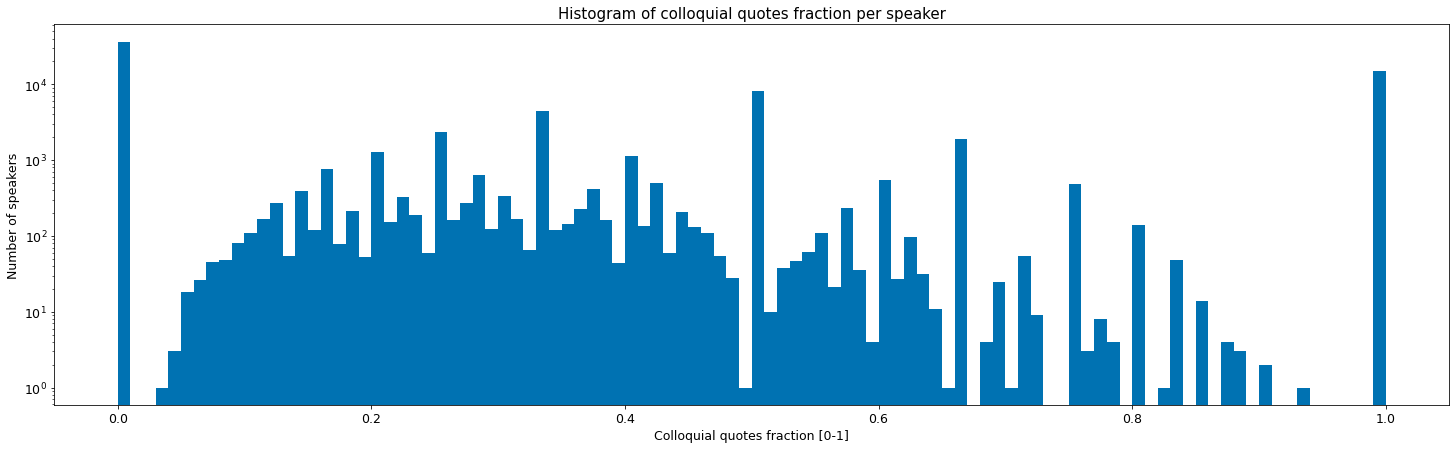

In [12]:
array_100 = plt.hist(df_plot['fraction'],bins=100,log=True)
plt.title('Histogram of colloquial quotes fraction per speaker')
plt.xlabel('Colloquial quotes fraction [0-1]')
plt.ylabel('Number of speakers')


It appears that a large number of speakers has a colloquial fraction equals to 0 or 1. These speakers correspond to the ones which have only 1 quote associated with. Therefore, their colloquial fraction could be only equals to 0 and 1. After a quick look, it appears that the same phenomena is osberved for fraction of integers.(1/2, 2/5)

For the next of the analysis, we will probably remove speakers that have only few quotes attributed.


- Fraction of colloquial language of 10 most represented speakers

[Text(0.5, 0, 'Speaker name'), Text(0, 0.5, 'Fraction of colloquial quotes')]

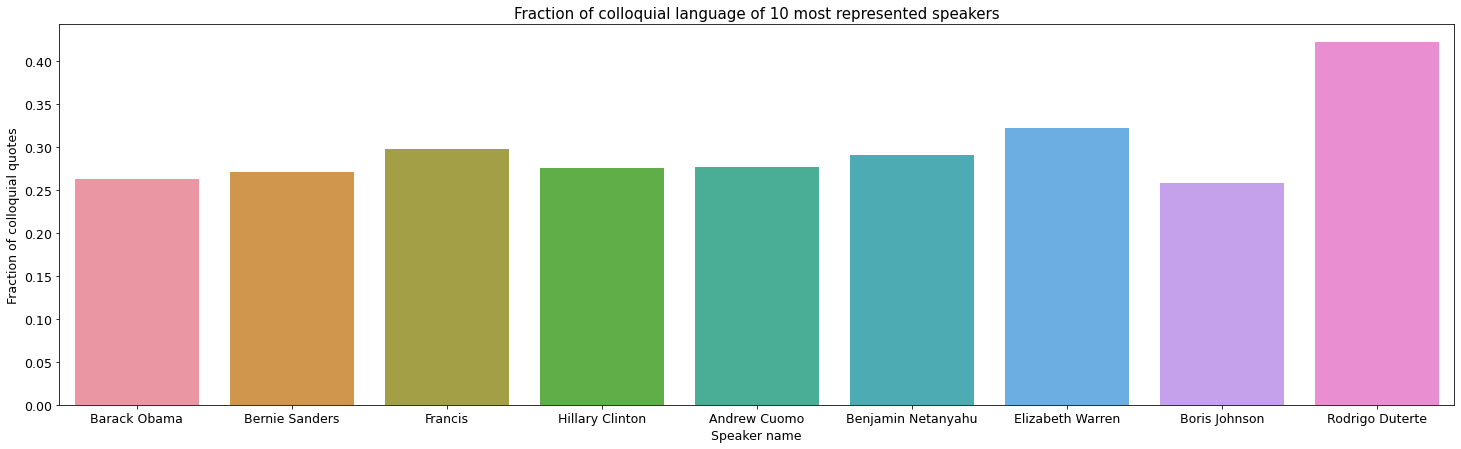

In [13]:
ax = sns.barplot(x="label", y="fraction",data=df_plot[:9])
ax.set_title('Fraction of colloquial language of 10 most represented speakers')
ax.set(xlabel='Speaker name',ylabel='Fraction of colloquial quotes')

Observing this plot, it underlines the fact that the more speaker is represented, the more his colloquial fraction tends to the average of the whole dataset. This statement underlines the weakness of the classification procedure.

- Fraction of colloquial langage by gender :  

[Text(0, 0.5, 'Average fraction of colloquial quotations')]

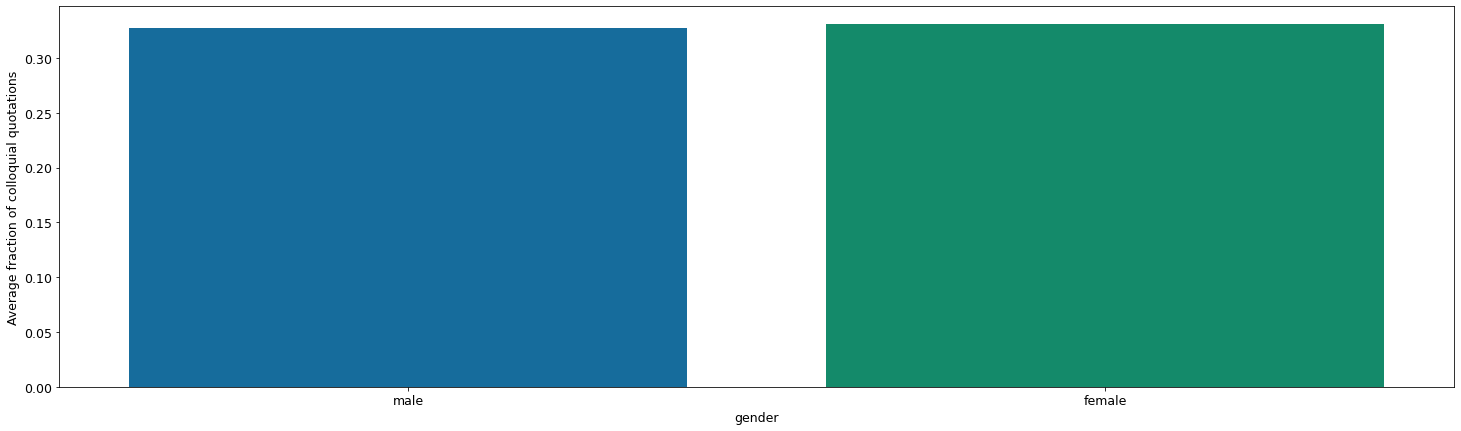

In [14]:
df_gender = df_plot.groupby('gender')['fraction'].mean() \
            .reset_index(name='mean_fraction')

df_gender['gender'] = df_gender['gender'].apply(lambda x: df_lookup.loc[x]['Label'])
df_gender = df_gender.set_index('gender')
df_mf = df_gender.loc[['male','female']].reset_index()

ax = sns.barplot(x='gender', y="mean_fraction", data=df_mf)
ax.set(ylabel='Average fraction of colloquial quotations')

[Text(0.5, 0, 'speaker_occupation'),
 Text(0, 0.5, 'Colloquial quotes fraction')]

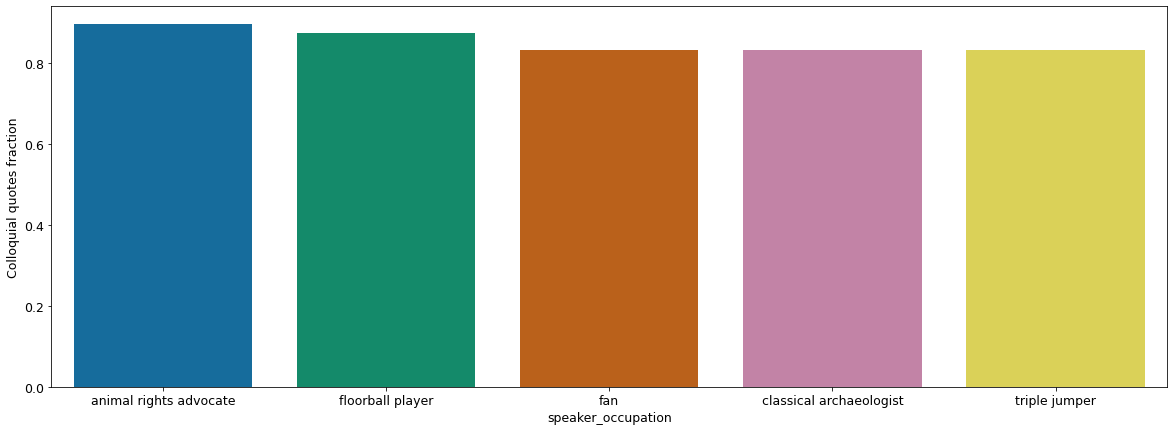

In [140]:
# fraction per occupation

df_occupation = df_plot.groupby('occupation')['fraction'].mean() \
                .reset_index(name='mean_fraction')\
                .sort_values(['mean_fraction'], ascending=False)

df_occupation['occupation'] = df_occupation['occupation'].apply(lambda x: df_lookup.loc[x]['Label'])

#Not taking in account the occupation with fraction equals to 1 (correspond to speakers with not sufficient amount of quotations)

df_test = df_occupation[df_occupation['mean_fraction']!=1]

ax = sns.barplot(x="occupation", y="mean_fraction", data=df_test[:5])
ax.set(xlabel='speaker_occupation',ylabel='Colloquial quotes fraction')



We can't derive anything from this plot above as we do not have the number of quotations in each occupation category. Then, the retrieval of the relative size of each category hasto be computed. However, it shows the possibilities from this speaker's aggregation and the different conclusions could be drawn thank to these metadata. 

**Conclusion** : 
These results could not give meaningful interpretations for now. Indeed, the classification method has to be improved. The main problem that seems to arise is the too large size (20 000 entries) of the informal dictionary used for classification. In next step, the dictionnary has to be filtered to keep only the terms that clearly distinguish informal/colloquial langage. It has to be avoid the terms that lies in the two categories. Additionnaly, the speakers with a too low number of quotations has to be filtered as their aggregation could biased the result.

